# Pandas for Data Analysis: Practicing your Data Analysis Skills

## Outline:

* [Dataset 1: Marvel Comics](#Dataset-1:-Marvel-Comics)
* [Dataset 2: PM 2.5 in Bangkok](#Dataset-2:-PM-2.5-in-Bangkok)
* [Dataset 3: Craft Beers](#Dataset-3:-Craft-Beers)
* [Dataset 4: Nutrition Facts for McDonald's Menu](#Dataset-4:-Nutrition-Facts-for-McDonald's-Menu)
* [Dataset 5: Shelter Animal Outcomes](#Dataset-5:-Shelter-Animal-Outcomes)

## Dataset 1: Marvel Comics

1. Get the most popular characters based on the number of appearances they made in comics over the years.
2. Get the year with most and least new Marvel characters introduced respectively, return a (max_year, min_year) tuple. Expect min/max to be pretty far apart.
3. What percentage of the comics characters is female? Please give us the percentage rounded to 2 digits.
4. Good vs bad characters: return a dictionary of bad vs good vs neutral characters per sex. The keys are Bad Characters, Good Characters, Neutral Characters, the values are integer percentages. Who plays the villain more often, a man or a woman?


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('data/marvel-wikia-data.csv')

In [4]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [5]:
df.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


In [6]:
#The following columns can be dropped as they don't contribute towards the goals of the challenge
df = df.drop(['GSM','urlslug', 'page_id', 'EYE', 'HAIR', 'ID'], axis='columns')

In [7]:
df.columns = map(str.lower, df.columns)
df.head()

,name,align,sex,alive,appearances,first appearance,year
0,Spider-Man (Peter Parker),Good Characters,Male Characters,Living Characters,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Good Characters,Male Characters,Living Characters,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral Characters,Male Characters,Living Characters,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good Characters,Male Characters,Living Characters,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),Good Characters,Male Characters,Living Characters,2258.0,Nov-50,1950.0


In [8]:
df.alive.unique()

array(['Living Characters', 'Deceased Characters', nan], dtype=object)

In [9]:
#Fill empty values for appearances, align and sex
df.appearances = df.appearances.fillna(1)
df['align'] = df['align'].fillna('Unknown')
df.sex = df.sex.fillna('Unknown')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16376 entries, 0 to 16375
Data columns (total 7 columns):
name                16376 non-null object
align               16376 non-null object
sex                 16376 non-null object
alive               16373 non-null object
appearances         16376 non-null float64
first appearance    15561 non-null object
year                15561 non-null float64
dtypes: float64(2), object(5)
memory usage: 895.6+ KB


In [10]:
#Remove the word characters from alive, sex and align
df['alive'] = df['alive'].str.replace(' Characters', '')
df['sex'] = df['sex'].str.replace(' Characters', '')
df['align'] = df['align'].str.replace(' Characters', '')
df.head()

,name,align,sex,alive,appearances,first appearance,year
0,Spider-Man (Peter Parker),Good,Male,Living,4043.0,Aug-62,1962.0
1,Captain America (Steven Rogers),Good,Male,Living,3360.0,Mar-41,1941.0
2,"Wolverine (James \""Logan\"" Howlett)",Neutral,Male,Living,3061.0,Oct-74,1974.0
3,"Iron Man (Anthony \""Tony\"" Stark)",Good,Male,Living,2961.0,Mar-63,1963.0
4,Thor (Thor Odinson),Good,Male,Living,2258.0,Nov-50,1950.0


### Characters with most appearances

In [11]:
%matplotlib inline

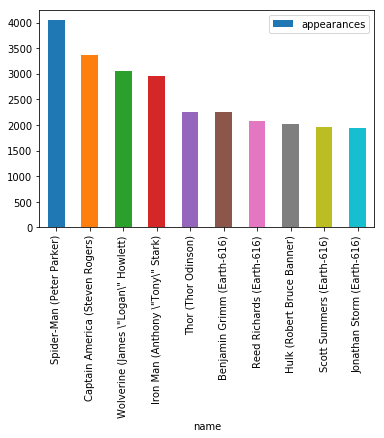

In [12]:
#Sort appearances in descending order
newdf = df.sort_values(by=['appearances'], ascending=False).head(10)
#Plot a graph of top 10 characters with most appearances
newdf.plot(kind='bar', x='name', y='appearances')

### Years with most and least new characters

In [13]:
import seaborn as sns

In [14]:
#Get the year with most and least new Marvel characters introduced respectively, return a (max_year, min_year) tuple. Expect min/max to be pretty far apart.
new = df.groupby(df['year'])['name'].count().reset_index()
minNewChars = new.sort_values(by=['name']).head(1)['year'].iloc[0]
maxNewChars = new.sort_values(by=['name']).tail(1)['year'].iloc[0]
#Print the results
print('Year with the most new characters', int(maxNewChars), 'and the year with the least new characters', int(minNewChars))

Year with the most new characters 1993 and the year with the least new characters 1958


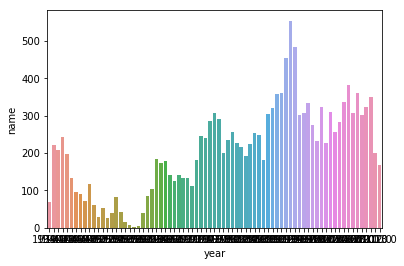

In [15]:
#Plot bar graph of character introductions per year
sns.barplot(x='year', y='name', data=new)

### Percentage of female characters

In [16]:
sex = df.groupby(by=df['sex'])['name'].count().reset_index(name='count')
sex['percent'] = sex['count'] / sex['count'].sum() * 100
sex['percent'] = sex['percent'].round(2)
sex = sex.set_index('sex')
percentagefemale = sex.at['Female', 'percent']
print('Percentage of female characters', percentagefemale, '%')

Percentage of female characters 23.43 %


### Good vs. Bad Characters

In [22]:
# Group by alignment and sex and do a count for each group
goodvbad = df.groupby(by=['align', 'sex'])['name'].count().reset_index(name='count')

# Create a percentage column
goodvbad['percent'] = goodvbad['count'] / goodvbad['count'].sum() * 100
goodvbad['percent'] = goodvbad['percent'].round(2)

goodvbad

# Add an index so that I can select rows for specific groupings
# goodvbad['index'] = goodvbad['align'].map(str) + goodvbad['sex']
# goodvbad = goodvbad.set_index('index')
# goodvbad['alignsex'] = goodvbad.index
# goodvbad

,align,sex,count,percent
0,Bad,Agender,20,0.12
1,Bad,Female,976,5.96
2,Bad,Male,5338,32.60
3,Bad,Unknown,386,2.36
4,Good,Agender,10,0.06
5,Good,Female,1537,9.39
6,Good,Genderfluid,1,0.01
7,Good,Male,2966,18.11
8,Good,Unknown,122,0.74
9,Neutral,Agender,13,0.08


In [24]:
goodvbad['alignsex'] = goodvbad['align'] + goodvbad['sex']

In [25]:
goodvbad

,align,sex,count,percent,alignsex
0,Bad,Agender,20,0.12,BadAgender
1,Bad,Female,976,5.96,BadFemale
2,Bad,Male,5338,32.60,BadMale
3,Bad,Unknown,386,2.36,BadUnknown
4,Good,Agender,10,0.06,GoodAgender
5,Good,Female,1537,9.39,GoodFemale
6,Good,Genderfluid,1,0.01,GoodGenderfluid
7,Good,Male,2966,18.11,GoodMale
8,Good,Unknown,122,0.74,GoodUnknown
9,Neutral,Agender,13,0.08,NeutralAgender


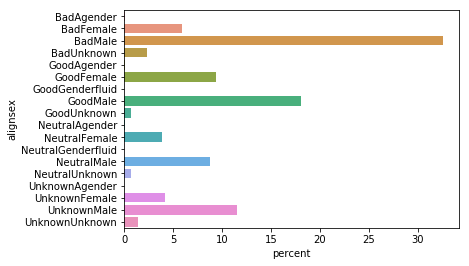

In [26]:
#Create a chart of the distribution of alignment and sex
sns.barplot(x='percent', y='alignsex', data=goodvbad)

In [30]:
#Show the percentage of bad males
males = goodvbad[['sex', 'align', 'count']].copy()
males = males.query('sex == "Male" & align != "Unknown"')
males['percent'] = males['count'] / males['count'].sum() * 100
males['percent'] = males['percent'].round()
males

,sex,align,count,percent
index,,,,
BadMale,Male,Bad,5338,55.0
GoodMale,Male,Good,2966,30.0
NeutralMale,Male,Neutral,1440,15.0


In [31]:
percentagebadmales = males.at['BadMale', 'percent']
print('Percentage of Bad Males: ', int(percentagebadmales))

Percentage of Bad Males:  55


In [32]:
females = goodvbad[['sex', 'align', 'count']].copy()
females = females.query('sex == "Female" & align != "Unknown"')
females['percent'] = females['count'] / females['count'].sum() * 100
females['percent'] = females['percent'].round()
females

,sex,align,count,percent
index,,,,
BadFemale,Female,Bad,976,31.0
GoodFemale,Female,Good,1537,49.0
NeutralFemale,Female,Neutral,640,20.0


In [34]:
#Show the percentage of bad females
percentagebadfemales = females.at['BadFemale', 'percent']
print('Percentage of Bad Females: ', int(percentagebadfemales))

Percentage of Bad Females:  31


---

## Dataset 2: PM 2.5 in Bangkok

http://berkeleyearth.lbl.gov/air-quality/local/Thailand/Bangkok/Bangkok

https://github.com/gain9999/PM2.5

https://medium.com/@gaingain/pm2-5-%E0%B8%81%E0%B8%B1%E0%B8%9A-data-science-ac1a89940a19

In [63]:
columns = ['Year', 'Month', 'Day', 'UTC Hour', 'PM2.5', 'PM10_mask', 'Retrospective']
df = pd.read_csv('data/Bangkok.txt', sep='\t', skiprows=range(0, 10), header=None, names=columns)

In [64]:
df.head()

,Year,Month,Day,UTC Hour,PM2.5,PM10_mask,Retrospective
0,2016,3,3,8,62.9,1.0,0
1,2016,3,3,9,62.9,1.0,0
2,2016,3,3,10,55.5,1.0,0
3,2016,3,3,11,55.5,1.0,0
4,2016,3,3,12,47.9,1.0,0


## Dataset 3: Craft Beers

https://www.kaggle.com/nickhould/craft-cans

* What is the number of breweries in each state?
* What is the city with most breweries?
* What is the average alcohol by volume brewed in each state?
* What is the most commonly brewed beer?
* What city brews the strongest beers?
* What is the most popular beer in North Dakota?
* Can you predict the beer type from the characteristics provided in the dataset?

**Note:**
* `abv`: The alcoholic content by volume with 0 being no alcohol and 1 being pure alcohol
* `ibu`: International bittering units, which describe how bitter a drink is
* `name`: Name of the beer
* `style`: Beer style (lager, ale, IPA, etc.)
* `ounces`: Size of beer in ounces

In [4]:
import pandas as pd

In [5]:
beers = pd.read_csv('data/beers.csv', index_col=0)

In [6]:
beers.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [7]:
breweries = pd.read_csv('data/breweries.csv', index_col=0)

In [8]:
breweries.head()

,name,city,state
0,NorthGate Brewing,Minneapolis,MN
1,Against the Grain Brewery,Louisville,KY
2,Jack's Abby Craft Lagers,Framingham,MA
3,Mike Hess Brewing Company,San Diego,CA
4,Fort Point Beer Company,San Francisco,CA


In [9]:
breweries['id'] = breweries.index

In [10]:
breweries.head(2)

,name,city,state,id
0,NorthGate Brewing,Minneapolis,MN,0
1,Against the Grain Brewery,Louisville,KY,1


In [11]:
df = pd.merge(beers, breweries, left_on='brewery_id', right_on='id')

In [18]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [12]:
avg_alcohal = df.groupby('state').mean().reset_index()[['state', 'abv']]

In [13]:
avg_alcohal.sort_values(by='abv', ascending=False)

,state,abv
33,NV,0.066900
7,DC,0.065625
17,KY,0.064600
15,IN,0.063394
22,MI,0.063377
5,CO,0.063372
14,IL,0.062022
1,AL,0.062000
49,WV,0.062000
35,OH,0.061959


## Dataset 4: Nutrition Facts for McDonald's Menu

https://www.kaggle.com/mcdonalds/nutrition-facts

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('data/mcdonald-menu.csv')

In [17]:
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [ ]:
df.loc[df['Calories'].idxmax(), :]['Item']

In [ ]:
df.loc[df['Calories'].idxmin(), :]['Item']

In [ ]:
df.sort_values('Calories', ascending=False)

In [ ]:
df.groupby('Category').mean()

In [ ]:
import seaborn as sns

In [ ]:
g = sns.boxplot(x='Category', y='Calories', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=45);

## Dataset 5: Shelter Animal Outcomes

https://www.kaggle.com/c/shelter-animal-outcomes

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
animals = pd.read_csv('data/shelter.csv')

In [20]:
animals.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


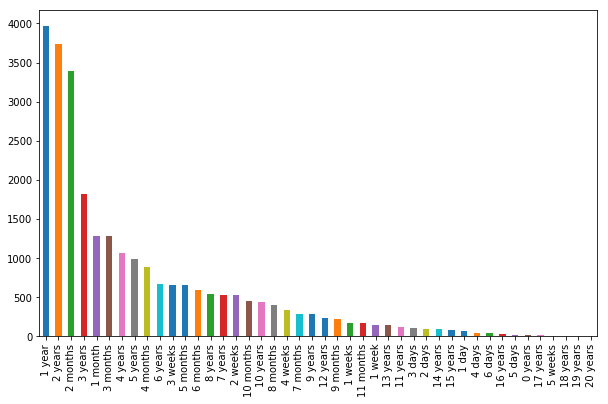

In [23]:
animals.AgeuponOutcome.value_counts().plot(kind='bar', figsize=(10, 6))

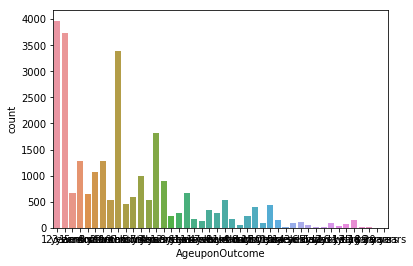

In [24]:
sns.countplot(data=animals, x=animals.AgeuponOutcome)

[Text(0, 0, '1 year'),
 Text(0, 0, '2 years'),
 Text(0, 0, '3 weeks'),
 Text(0, 0, '1 month'),
 Text(0, 0, '5 months'),
 Text(0, 0, '4 years'),
 Text(0, 0, '3 months'),
 Text(0, 0, '2 weeks'),
 Text(0, 0, '2 months'),
 Text(0, 0, '10 months'),
 Text(0, 0, '6 months'),
 Text(0, 0, '5 years'),
 Text(0, 0, '7 years'),
 Text(0, 0, '3 years'),
 Text(0, 0, '4 months'),
 Text(0, 0, '12 years'),
 Text(0, 0, '9 years'),
 Text(0, 0, '6 years'),
 Text(0, 0, '1 weeks'),
 Text(0, 0, '11 years'),
 Text(0, 0, '4 weeks'),
 Text(0, 0, '7 months'),
 Text(0, 0, '8 years'),
 Text(0, 0, '11 months'),
 Text(0, 0, '4 days'),
 Text(0, 0, '9 months'),
 Text(0, 0, '8 months'),
 Text(0, 0, '15 years'),
 Text(0, 0, '10 years'),
 Text(0, 0, '1 week'),
 Text(0, 0, '0 years'),
 Text(0, 0, '14 years'),
 Text(0, 0, '3 days'),
 Text(0, 0, '6 days'),
 Text(0, 0, '5 days'),
 Text(0, 0, '5 weeks'),
 Text(0, 0, '2 days'),
 Text(0, 0, '16 years'),
 Text(0, 0, '1 day'),
 Text(0, 0, '13 years'),
 Text(0, 0, '17 years'),
 Text

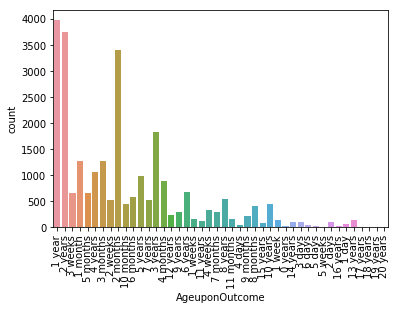

In [25]:
g = sns.countplot(data=animals, x=animals.AgeuponOutcome)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, '1 year'),
 Text(0, 0, '2 years'),
 Text(0, 0, '3 weeks'),
 Text(0, 0, '1 month'),
 Text(0, 0, '5 months'),
 Text(0, 0, '4 years'),
 Text(0, 0, '3 months'),
 Text(0, 0, '2 weeks'),
 Text(0, 0, '2 months'),
 Text(0, 0, '10 months'),
 Text(0, 0, '6 months'),
 Text(0, 0, '5 years'),
 Text(0, 0, '7 years'),
 Text(0, 0, '3 years'),
 Text(0, 0, '4 months'),
 Text(0, 0, '12 years'),
 Text(0, 0, '9 years'),
 Text(0, 0, '6 years'),
 Text(0, 0, '1 weeks'),
 Text(0, 0, '11 years'),
 Text(0, 0, '4 weeks'),
 Text(0, 0, '7 months'),
 Text(0, 0, '8 years'),
 Text(0, 0, '11 months'),
 Text(0, 0, '4 days'),
 Text(0, 0, '9 months'),
 Text(0, 0, '8 months'),
 Text(0, 0, '15 years'),
 Text(0, 0, '10 years'),
 Text(0, 0, '1 week'),
 Text(0, 0, '0 years'),
 Text(0, 0, '14 years'),
 Text(0, 0, '3 days'),
 Text(0, 0, '6 days'),
 Text(0, 0, '5 days'),
 Text(0, 0, '5 weeks'),
 Text(0, 0, '2 days'),
 Text(0, 0, '16 years'),
 Text(0, 0, '1 day'),
 Text(0, 0, '13 years'),
 Text(0, 0, '17 years'),
 Text

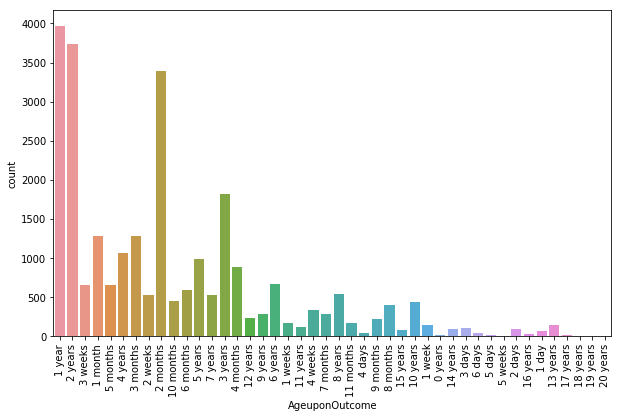

In [26]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.countplot(data=animals, x=animals.AgeuponOutcome, ax=ax)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [27]:
def get_age_in_days(age_upon_outcome):
    if str(age_upon_outcome) == 'nan':
        return 0
    time_value, unit = age_upon_outcome.split(' ')
    if unit == 'year' or unit == 'years':
        return int(time_value) * 365
    if unit in ['month', 'months']:
        return int(time_value) * 30
    if unit in ['week', 'weeks']:
        return int(time_value) * 7
    if unit in ['day', 'days']:
        return int(time_value)

In [28]:
animals['AgeInDays'] = animals.AgeuponOutcome.map(get_age_in_days)

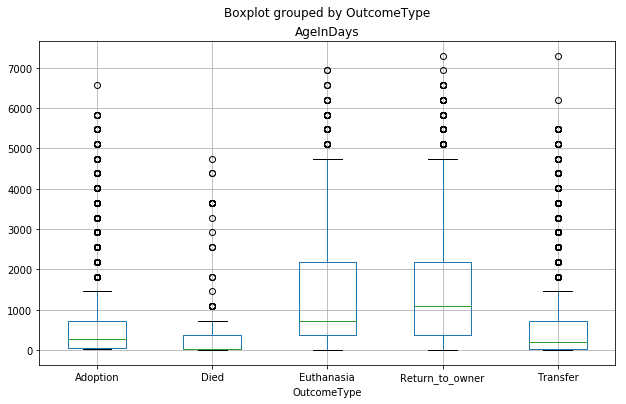

In [29]:
animals.boxplot(column=['AgeInDays'], by='OutcomeType', figsize=(10, 6))

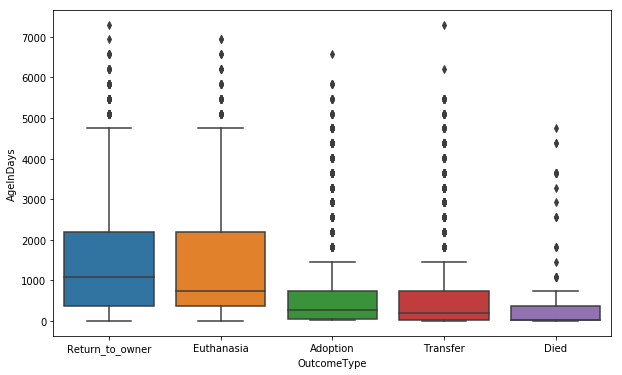

In [30]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.boxplot(data=animals, x='OutcomeType', y='AgeInDays', ax=ax)

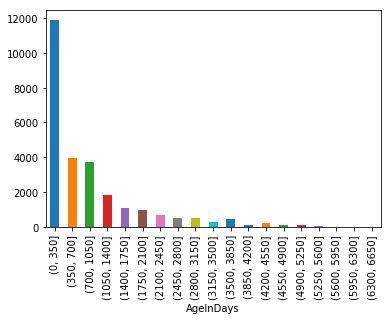

In [31]:
pd.cut(animals.AgeInDays, list(range(0, 7000, 100))).head(5)
animals.groupby(pd.cut(animals.AgeInDays, list(range(0, 7000, 350)))).mean()
avg_data_by_age = animals.groupby(pd.cut(animals.AgeInDays, list(range(0, 7000, 350)))).count()
avg_data_by_age.AgeInDays.plot(kind='bar')

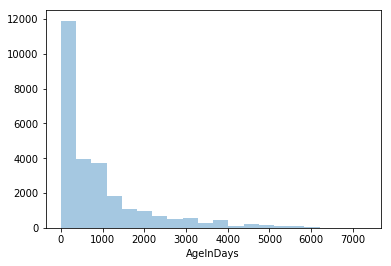

In [33]:
sns.distplot(animals.AgeInDays, bins=20, kde=False)

ดู distribution ของสัตว์แต่ละชนิด

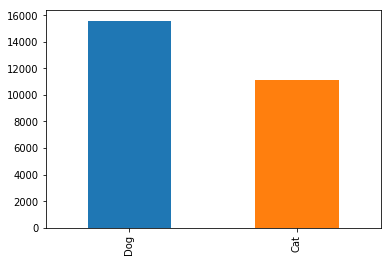

In [34]:
animals.AnimalType.value_counts().plot(kind='bar')

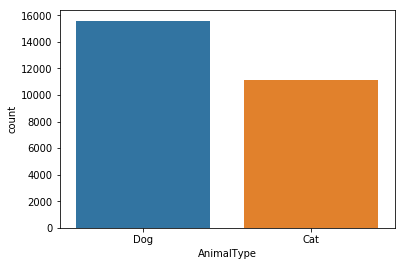

In [35]:
sns.countplot(data=animals, x=animals.AnimalType)

ดู distribution ของ outcome type

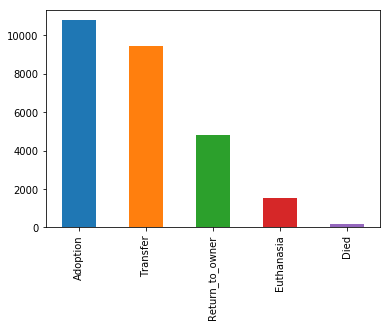

In [36]:
animals['OutcomeType'].value_counts().plot(kind='bar')

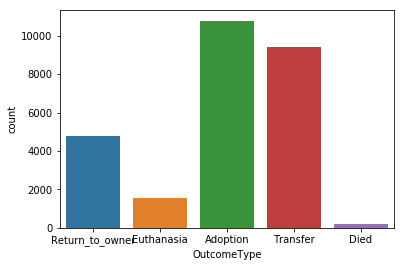

In [37]:
sns.countplot(data=animals, x=animals.OutcomeType)

เทียบ distribution ของสัตว์แต่ละชนิดโดยแยกตาม outcome type

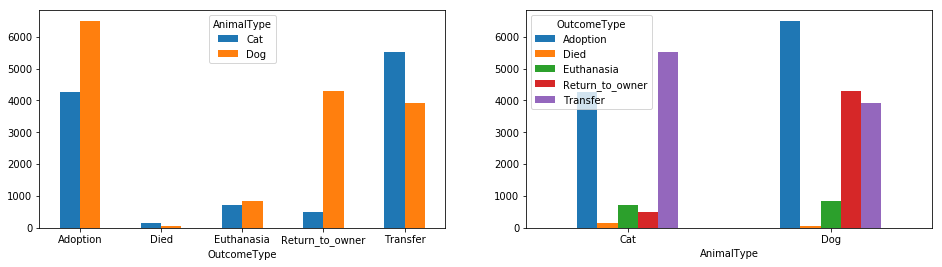

In [38]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
animals[['AnimalType', 'OutcomeType']].groupby(['OutcomeType', 'AnimalType']).size().unstack().plot(kind='bar', ax=ax1, rot=0)
animals[['AnimalType', 'OutcomeType']].groupby(['AnimalType', 'OutcomeType']).size().unstack().plot(kind='bar', ax=ax2, rot=0)

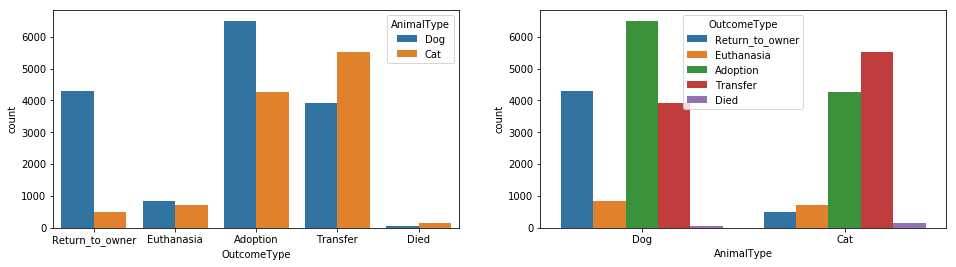

In [39]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType', hue='AnimalType', ax=ax1)
sns.countplot(data=animals, x='AnimalType',hue='OutcomeType', ax=ax2)

ดู distribution ของเพศ

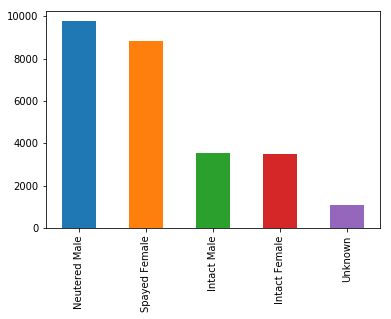

In [40]:
animals['SexuponOutcome'].value_counts().plot(kind='bar')

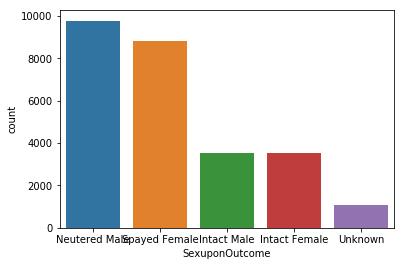

In [41]:
sns.countplot(data=animals, x=animals.SexuponOutcome)

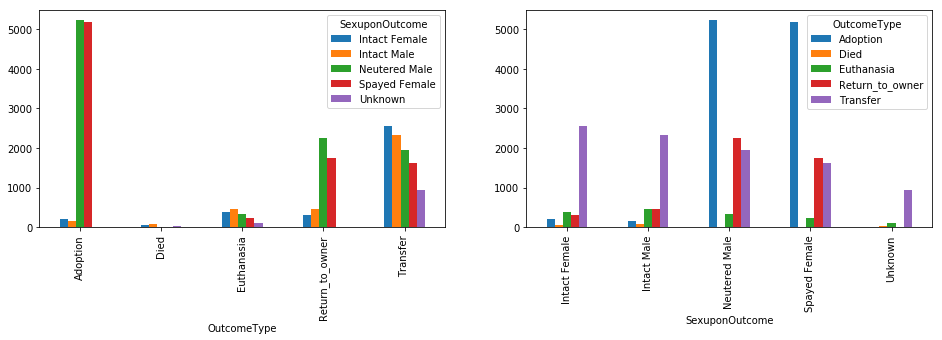

In [42]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
animals[['SexuponOutcome', 'OutcomeType']].groupby(['OutcomeType', 'SexuponOutcome']).size().unstack().plot(kind='bar', ax=ax1)
animals[['SexuponOutcome', 'OutcomeType']].groupby(['SexuponOutcome', 'OutcomeType']).size().unstack().plot(kind='bar', ax=ax2)

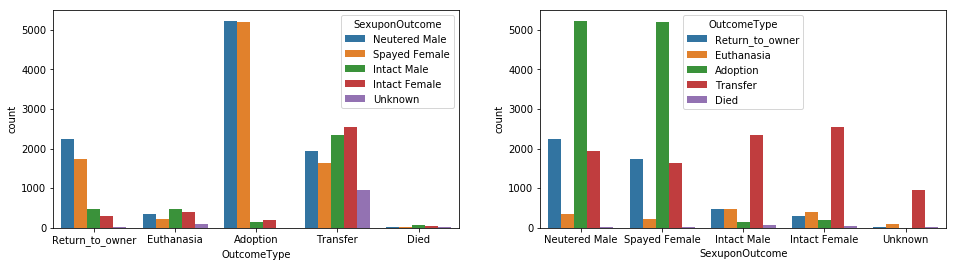

In [43]:
_, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='OutcomeType', hue='SexuponOutcome', ax=ax1)
sns.countplot(data=animals, x='SexuponOutcome',hue='OutcomeType', ax=ax2)

In [44]:
def get_sex(x):
    x = str(x)
    if 'Male' in x: return 'male'
    if 'Female' in x: return 'female'
    return 'unknown'

In [45]:
animals['Sex'] = animals.SexuponOutcome.apply(get_sex)

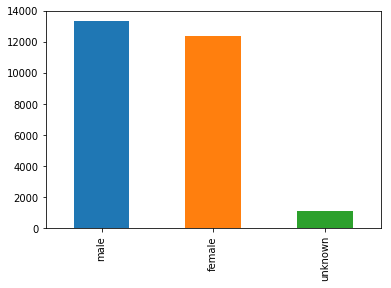

In [46]:
animals.Sex.value_counts().plot(kind='bar')

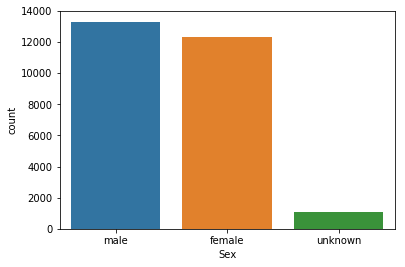

In [47]:
sns.countplot(x=animals.Sex)

In [48]:
def get_neutered(x):
    x = str(x)
    if 'Spayed' in x: return 'neutered'
    if 'Neutered' in x: return 'neutered'
    if 'Intact' in x: return 'intact'
    return 'unknown'

In [49]:
animals['Neutered'] = animals.SexuponOutcome.apply(get_neutered)

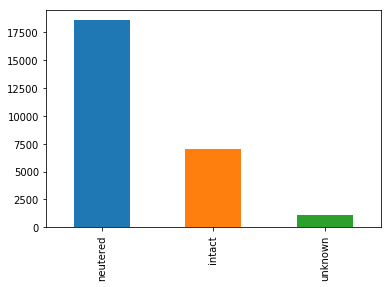

In [50]:
animals.Neutered.value_counts().plot(kind='bar')

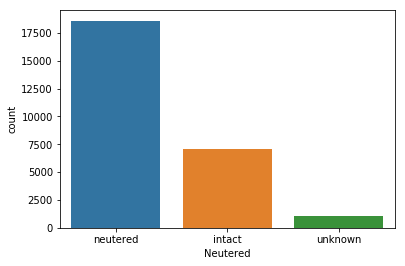

In [51]:
sns.countplot(x=animals.Neutered)

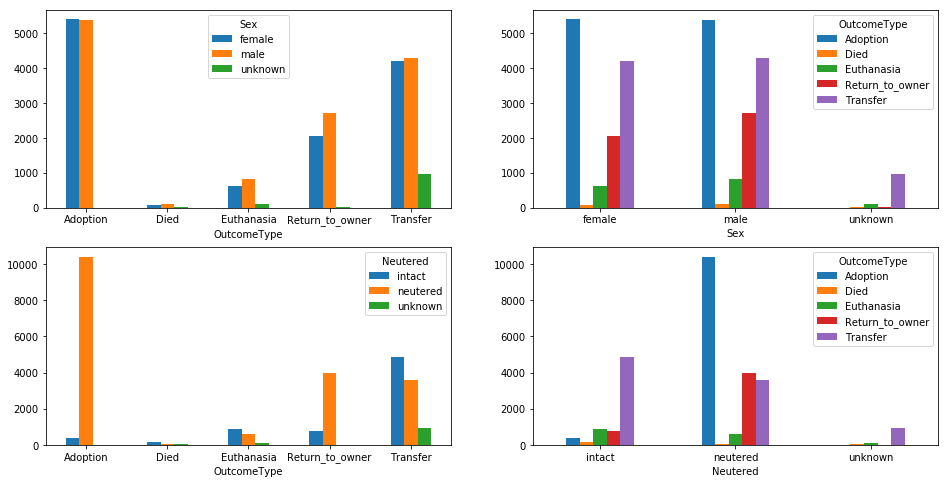

In [52]:
_, (ax1, ax2) = plt.subplots(2, 2, figsize=(16, 8), )
animals[['Sex', 'OutcomeType']].groupby(['OutcomeType', 'Sex']).size().unstack().plot(kind='bar', ax=ax1[0], rot=0)
animals[['Sex', 'OutcomeType']].groupby(['Sex', 'OutcomeType']).size().unstack().plot(kind='bar', ax=ax1[1], rot=0)
animals[['Neutered', 'OutcomeType']].groupby(['OutcomeType', 'Neutered']).size().unstack().plot(kind='bar', ax=ax2[0], rot=0)
animals[['Neutered', 'OutcomeType']].groupby(['Neutered', 'OutcomeType']).size().unstack().plot(kind='bar', ax=ax2[1], rot=0)

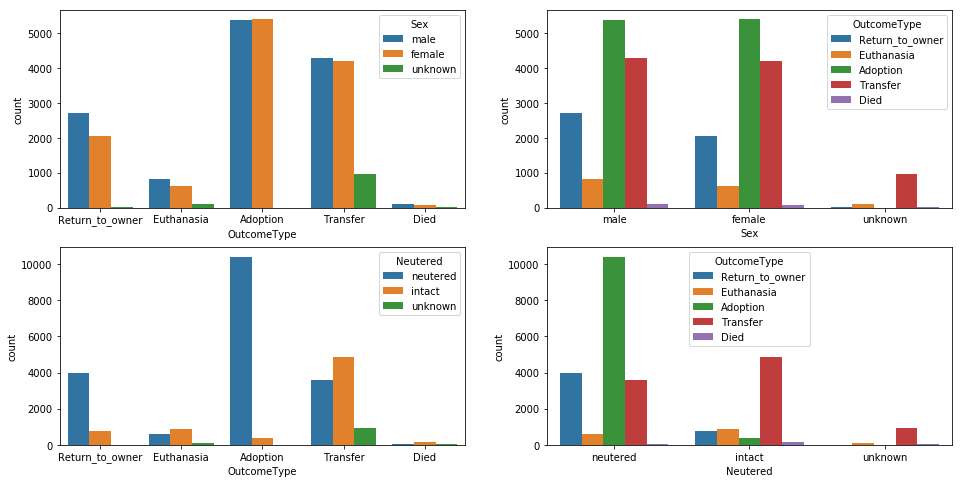

In [53]:
_, (ax1, ax2) = plt.subplots(2, 2, figsize=(16, 8))
sns.countplot(data=animals, x='OutcomeType', hue='Sex', ax=ax1[0])
sns.countplot(data=animals, x='Sex', hue='OutcomeType', ax=ax1[1])
sns.countplot(data=animals, x='OutcomeType', hue='Neutered', ax=ax2[0])
sns.countplot(data=animals, x='Neutered', hue='OutcomeType', ax=ax2[1])